<a href="https://colab.research.google.com/github/ELiTE0005/NNML-algorithms/blob/main/Implementation_of_a_classifier_using_open_source_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

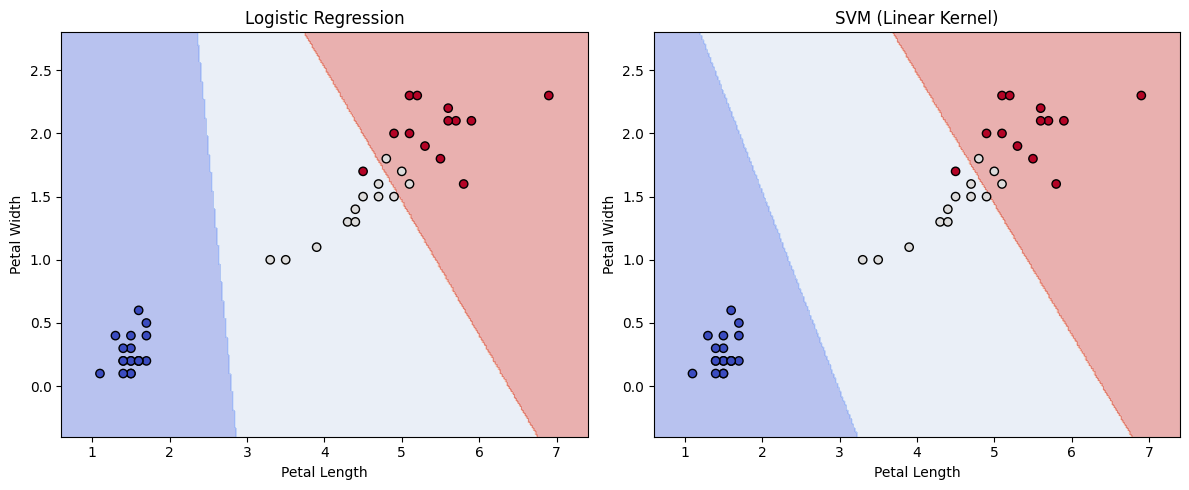

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/iris.data.csv')


# Add column names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Use petal_length and petal_width for 2D visualization
X = df[['petal_length', 'petal_width']].values
y = LabelEncoder().fit_transform(df['species'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression and SVM classifiers
log_reg = LogisticRegression(max_iter=200)
svm_clf = SVC(kernel='linear', probability=True)

log_reg.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title(title)

# Plotting both classifiers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(log_reg, X_test, y_test, "Logistic Regression")

plt.subplot(1, 2, 2)
plot_decision_boundary(svm_clf, X_test, y_test, "SVM (Linear Kernel)")

plt.tight_layout()
plt.show()